<a href="https://colab.research.google.com/github/msnaru/PRML/blob/master/scr/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木

## 決定木の訓練と可視化

[決定木の可視化ライブラリ「dtreeviz」が凄かったのでまとめる](http://st-hakky.hatenablog.com/entry/2018/09/30/172910)

In [31]:
!pip install -q pydot
!apt-get -qq install -y graphviz
!pip install dtreeviz

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DTC

iris = load_iris()
x = iris.data
y = iris.target

tree_clf = DTC(max_depth = 3)
tree_clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = iris.feature_names,
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
 
graph = pydotplus.graphviz.graph_from_dot_file('iris_tree.dot')
graph.write_png('iris_tree.png')
Image(graph.create_png())

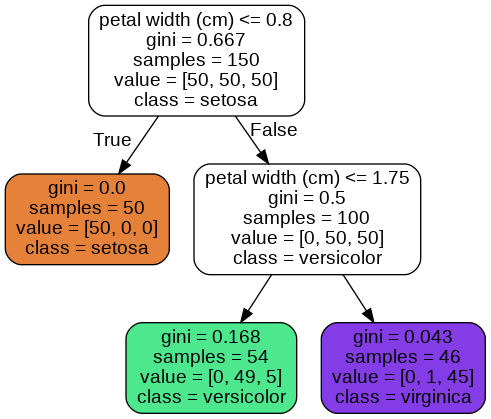

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


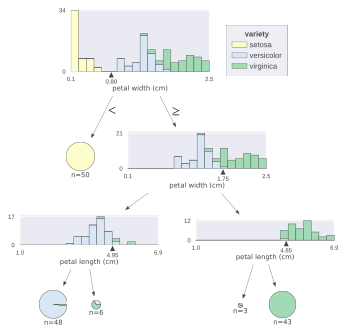

In [30]:
%matplotlib inline
from dtreeviz.trees import dtreeviz
import pdb

viz = dtreeviz(
    tree_clf,
    iris.data, 
    iris.target,
    target_name='variety',
    feature_names=iris.feature_names,
    class_names=[str(i) for i in iris.target_names]
) 

display(viz)

## CARTアルゴリズム
*Classification and Regression Tree*


決定木では、ある特徴$k$とその閾値$t_k$のセット$(k, t_k)$を使って2つのサブセットに分割する。

CARTではコスト関数$J$が最小化される$(k, t_k)$を探す。

$J(k, t_k) = \frac{m_left}{m} G_left + \frac{m_right}{m} G_right$

ただし、$G$はサブセットの不純度を表す

### 不純度
不純度にはジニ不純度とエントロピーが利用される。
ほどんどの場合、どちらを使っても大差ないが、ジニ不純度のほうが高速である。

##### ジニ不純度
$G_i = 1- \Sigma^n_{k=1}p_{i, k}^2$

##### エントロピー
$H_i = -\Sigma^n_{k=1}p_{i,k}log(p_{i,k})$ 

ただし$p_{i,k}\not=0$

## 正則化ハイパーパラメータ

決定木は訓練データに対して事前情報を持たないノンパラメトリックモデルであり、**過学習を起こしやすい**。

CART以外のアルゴリズムでは、制限無しで決定木を学習したのち、不要なノードを剪定していく。剪定には統計的検定が利用される。

+ max_depth：　　　　　　　木の深さ
+ min_samples_leaf：　　　　葉ノードが持つべきサンプル数の下限
+ min_weight_fraction_leaf：　"min_samples_leaf"の割合ver
+ max_leaf_nodes：　　　　　葉ノード数の上限
+ max_featuers：　　　　　　評価に利用される特徴数の上限